In [1]:
import os
import sys
#sys.path.append('/home/cjw/Code/DeepLearning')

import tensorflow as tf
import numpy as np
import pandas as pd

from autoencoder import autoencoder_train
from autoencoder import network
from autoencoder import utils

/home/cjw/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#datadir = "/v/Data/cyto/ChannelOne/"
datadir = "/media/cjw/Data/cyto/Mouse/mmCompensated/"

mmfiles = utils.list_mmfiles(datadir)
print(mmfiles)

mmdict = dict()

n_all_images = 0
for mmfilename in mmfiles:
#mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"
#mmfilename = datadir + "mmplate15-1.mm"
    mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

    header_shape = mmheader.shape
    print(header_shape, mmheader)
    xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
    xshape = tuple(xshape)
    del mmheader
    n_all_images += xshape[0]
    
    m3 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)
    key = mmfilename.split("/")[-1]
    mmdict[key] = m3

print(n_all_images)
mmdict.keys()

['/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse1_Phago.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse1_Ice.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse3_Ice.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse1_Ccb.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse2_Ccb.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse2_Phago.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse3_Phago.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse3_Ccb.mm', '/media/cjw/Data/cyto/Mouse/mmCompensated/Mouse2_Ice.mm']
(4,) [9980   64   64    5]
(4,) [9994   64   64    5]
(4,) [9582   64   64    5]
(4,) [9471   64   64    5]
(4,) [9370   64   64    5]
(4,) [9461   64   64    5]
(4,) [9378   64   64    5]
(4,) [9114   64   64    5]
(4,) [9088   64   64    5]
85438


dict_keys(['Mouse1_Phago.mm', 'Mouse1_Ice.mm', 'Mouse3_Ice.mm', 'Mouse1_Ccb.mm', 'Mouse2_Ccb.mm', 'Mouse2_Phago.mm', 'Mouse3_Phago.mm', 'Mouse3_Ccb.mm', 'Mouse2_Ice.mm'])

In [3]:
n = xshape[0]
all_ids =  range(n_all_images)
idx = 0
dataframes = list()
for key in mmdict.keys():
    mm = mmdict[key]
    n = mm.shape[0]
    #print(n)
    file = n*[key[0:-3]]
    fid = range(n)
    mmfile = n*[key]
    plate = n*[0]
    row = n*[0]
    column = n*[0]
    field = n*[0]
    yc = n*[32]
    xc = n*[32]
    well = n*[0]
    ids = all_ids[idx:idx + n]
    idx += n
    df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                     'row':row, 'column':column, 'field':field,
                      'yc':yc, 'xc':xc, 'well':well})

    dataframes.append(df)
    
p_df = pd.concat(dataframes, ignore_index=True)

Encoder True
Tensor("Placeholder:0", shape=(?, 32, 32, 4), dtype=float32) (?, 32, 32, 4)
isize:  4 32
dh0 (?, 32, 32, 4)
85438 667 128
76895 8543
Epoch:  0 Iteration:  0 Loss:  629.9665 624.762 5.2044625


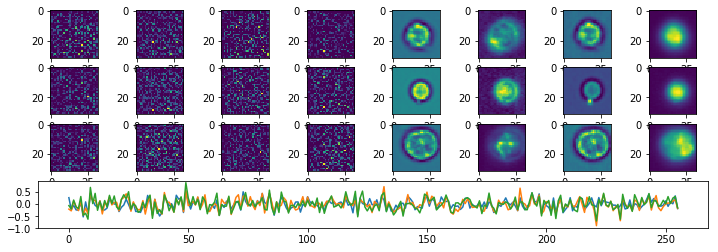

Epoch:  1 Iteration:  0 Loss:  14.975466 14.002953 0.9725127


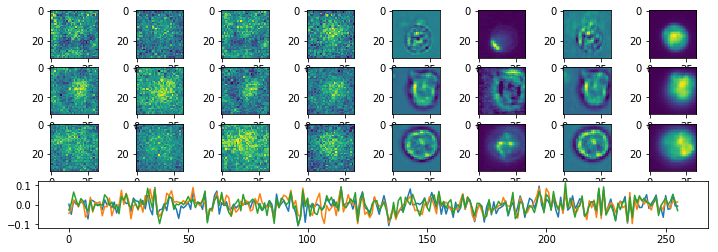

Epoch:  2 Iteration:  0 Loss:  11.130629 10.724253 0.40637544


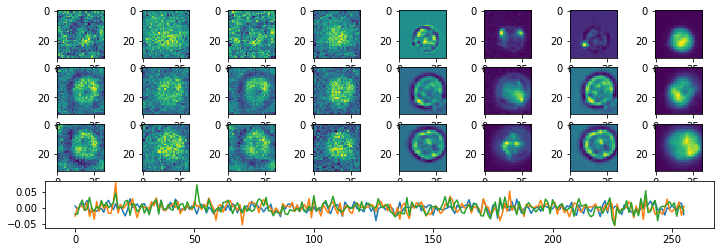

Epoch:  3 Iteration:  0 Loss:  8.786709 8.429464 0.3572448


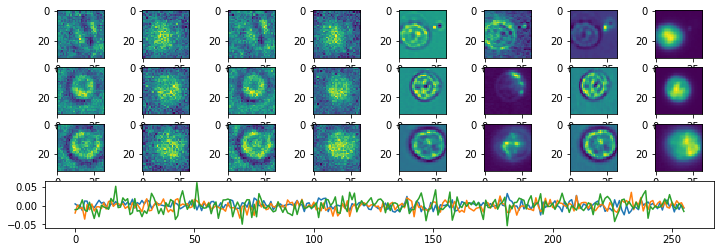

Epoch:  4 Iteration:  0 Loss:  6.9583697 6.622325 0.33604464


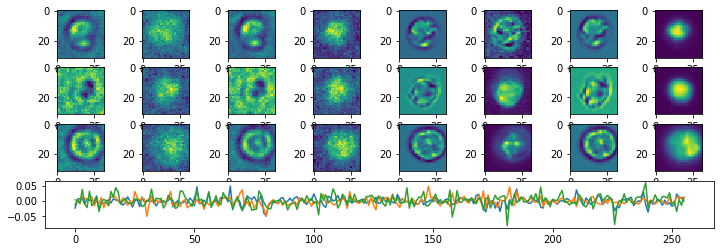

Epoch:  5 Iteration:  0 Loss:  5.9713345 5.6554837 0.31585085


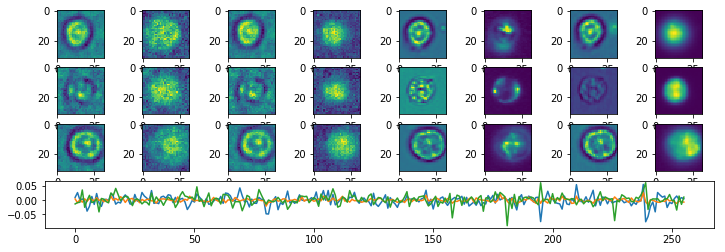

Epoch:  6 Iteration:  0 Loss:  5.3744974 5.0861216 0.28837568


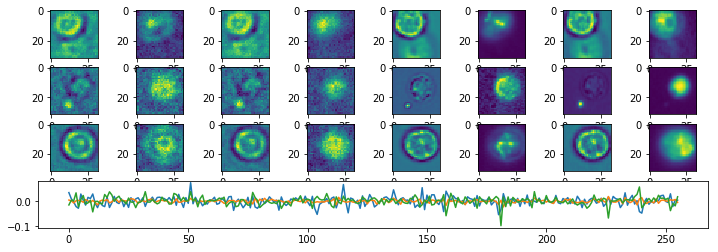

Epoch:  7 Iteration:  0 Loss:  4.713576 4.4375453 0.27603042


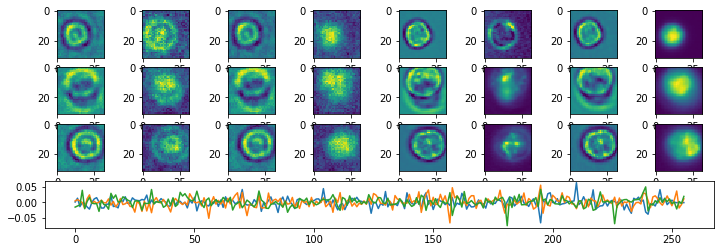

Epoch:  8 Iteration:  0 Loss:  4.324804 4.0753613 0.2494424


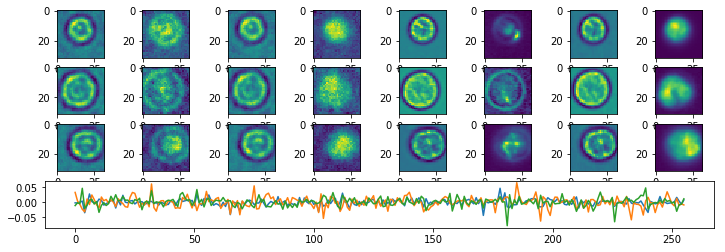

Epoch:  9 Iteration:  0 Loss:  3.9789946 3.719351 0.25964355


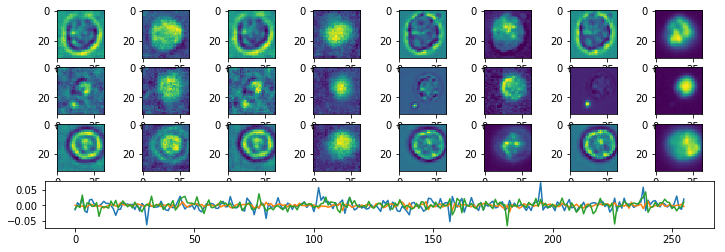

Epoch:  10 Iteration:  0 Loss:  3.5813122 3.3506317 0.23068058


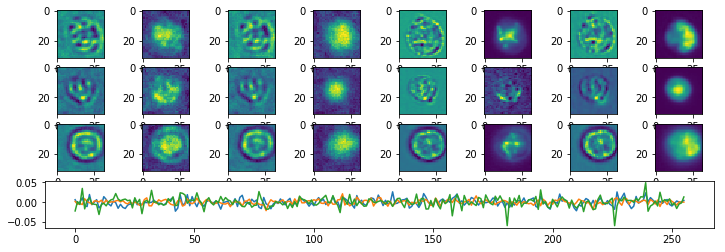

Epoch:  11 Iteration:  0 Loss:  3.6166651 3.3796453 0.23701969


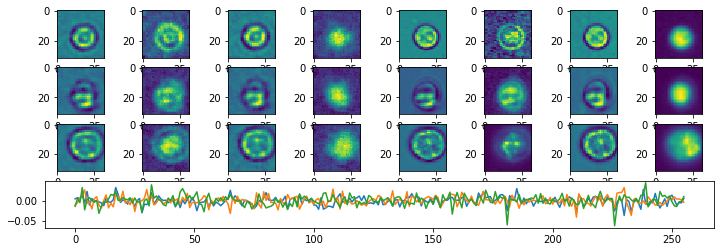

Epoch:  12 Iteration:  0 Loss:  3.1483319 2.9440122 0.20431961


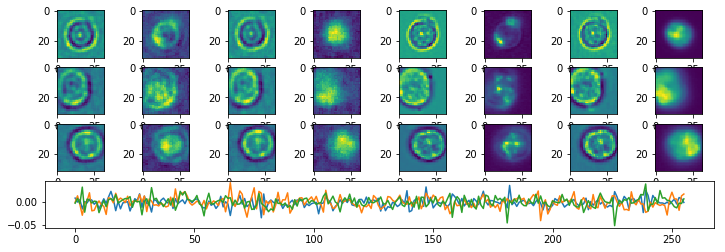

Epoch:  13 Iteration:  0 Loss:  3.0980232 2.8987565 0.19926664


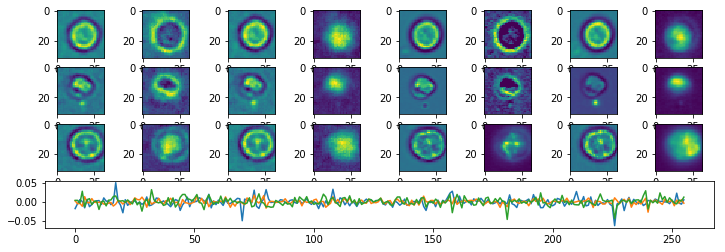

Epoch:  14 Iteration:  0 Loss:  3.0221722 2.8211966 0.20097557


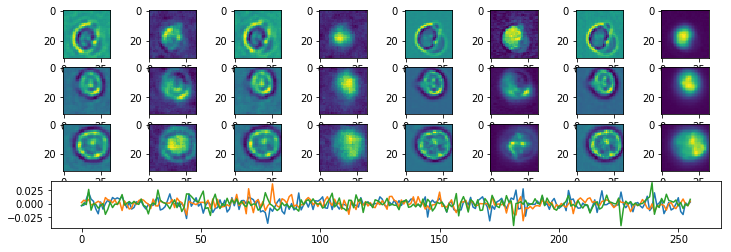

Epoch:  15 Iteration:  0 Loss:  2.7948914 2.6062539 0.18863757


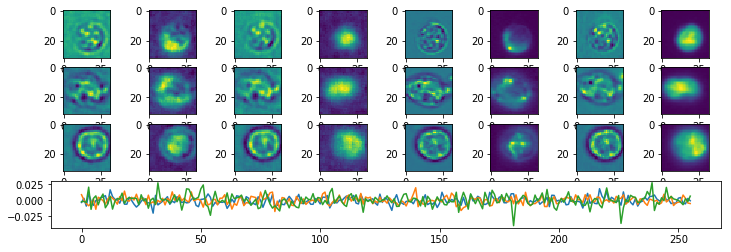

Epoch:  16 Iteration:  0 Loss:  2.5497017 2.3858018 0.16389982


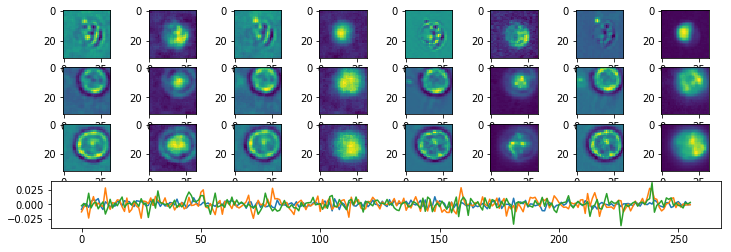

Epoch:  17 Iteration:  0 Loss:  2.6136167 2.4393773 0.17423938


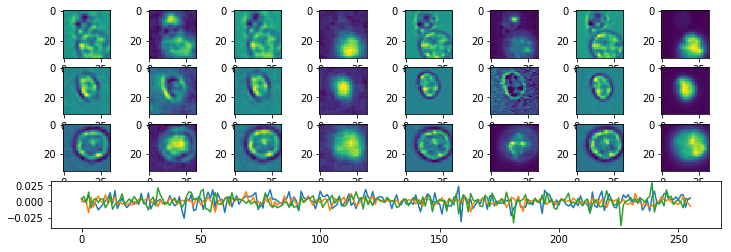

Epoch:  18 Iteration:  0 Loss:  2.4000657 2.2525682 0.14749739


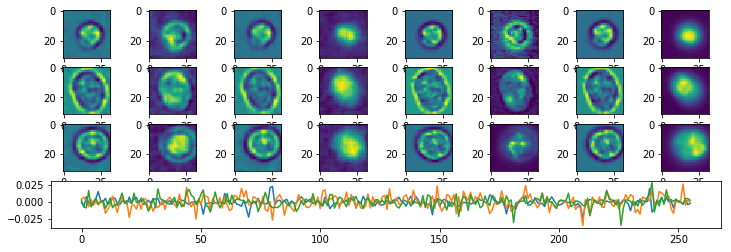

Epoch:  19 Iteration:  0 Loss:  2.630448 2.3548985 0.2755497


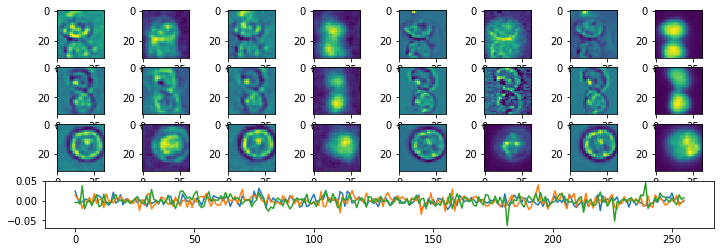

Epoch:  20 Iteration:  0 Loss:  2.3966568 2.1841257 0.21253105


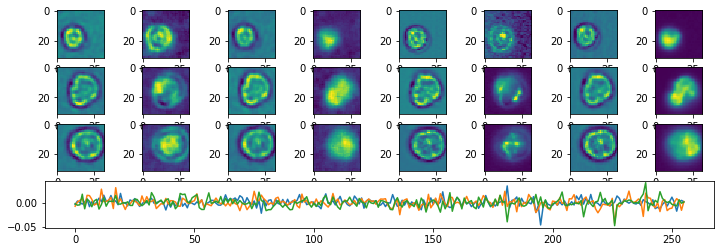

Epoch:  21 Iteration:  0 Loss:  2.2976048 2.1069365 0.19066845


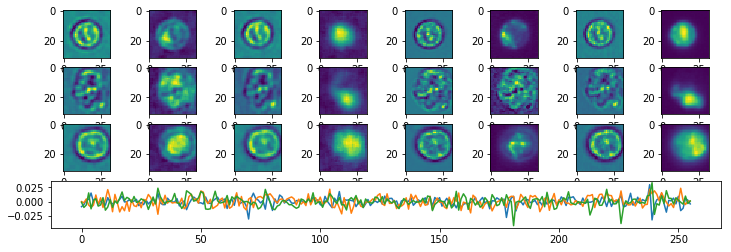

Epoch:  22 Iteration:  0 Loss:  2.2445233 2.0733848 0.17113861


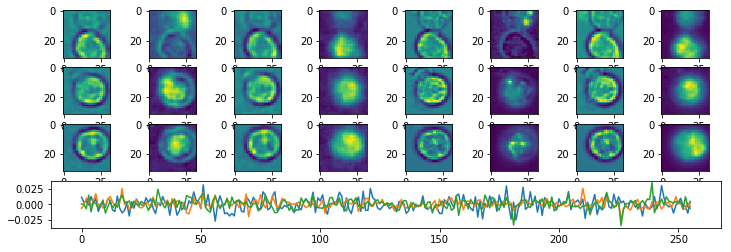

Epoch:  23 Iteration:  0 Loss:  2.2680402 2.104288 0.16375196


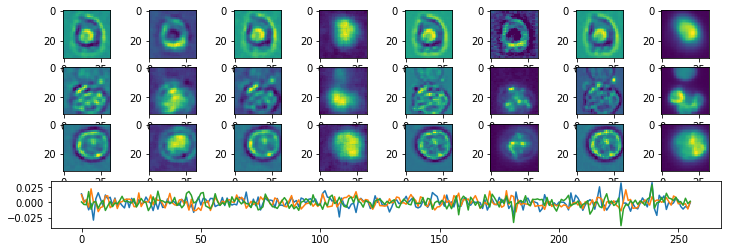

Epoch:  24 Iteration:  0 Loss:  2.3424723 2.1795948 0.16287756


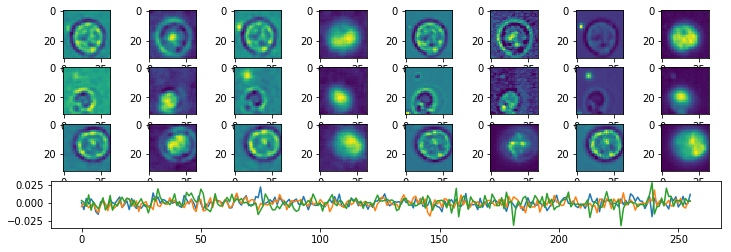

Epoch:  25 Iteration:  0 Loss:  2.2685678 2.1113763 0.15719147


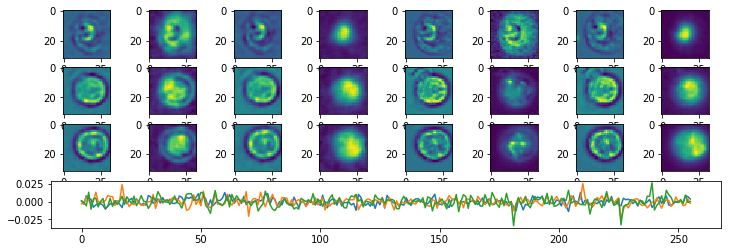

Epoch:  26 Iteration:  0 Loss:  2.1671615 2.0178185 0.14934312


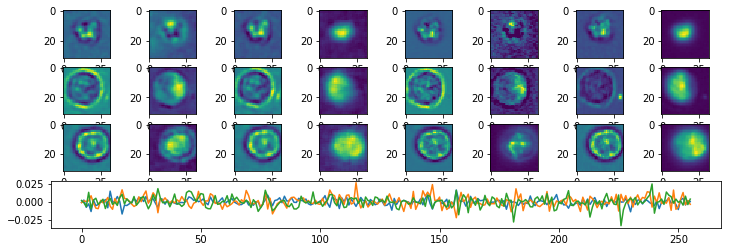

Epoch:  27 Iteration:  0 Loss:  2.1279676 1.9854631 0.14250448


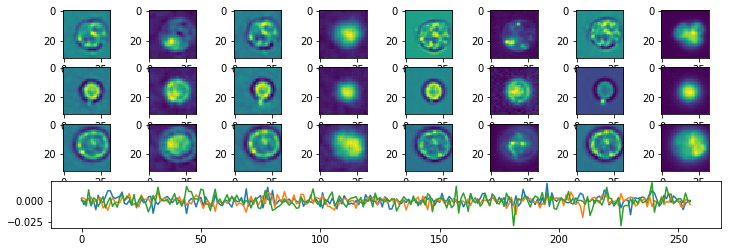

Epoch:  28 Iteration:  0 Loss:  1.9720247 1.8368042 0.13522057


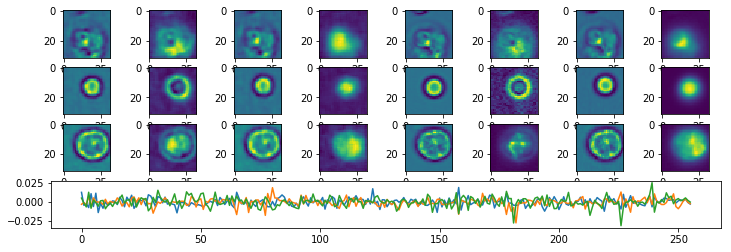

Epoch:  29 Iteration:  0 Loss:  2.1437843 2.0080972 0.13568705


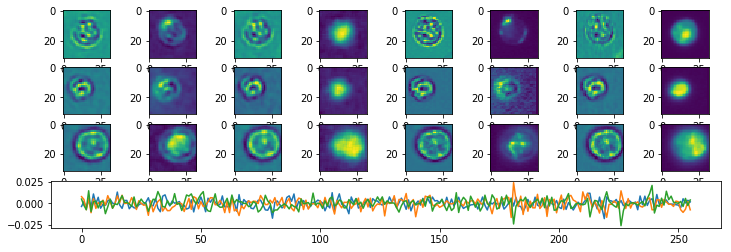

Epoch:  30 Iteration:  0 Loss:  1.9871811 1.8519557 0.13522545


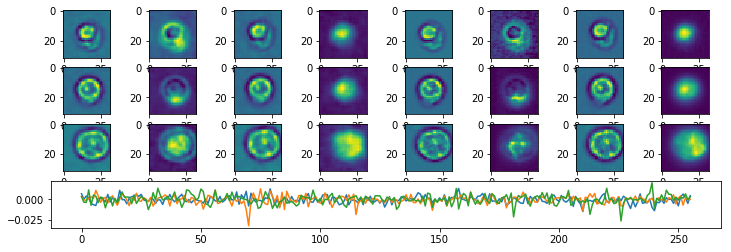

Epoch:  31 Iteration:  0 Loss:  3.3425746 2.915516 0.42705882


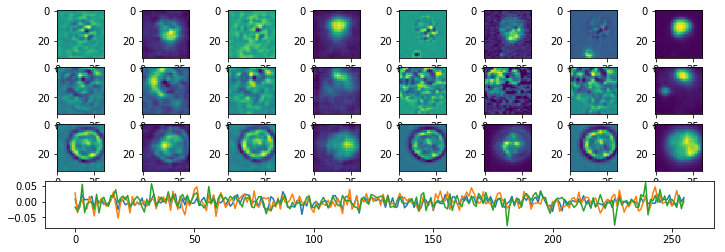

Epoch:  32 Iteration:  0 Loss:  2.2351685 2.0073493 0.22781925


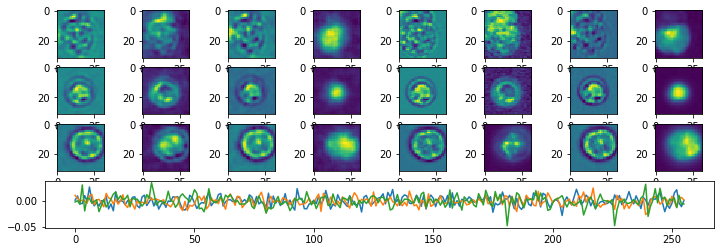

Epoch:  33 Iteration:  0 Loss:  1.9964746 1.8106468 0.1858278


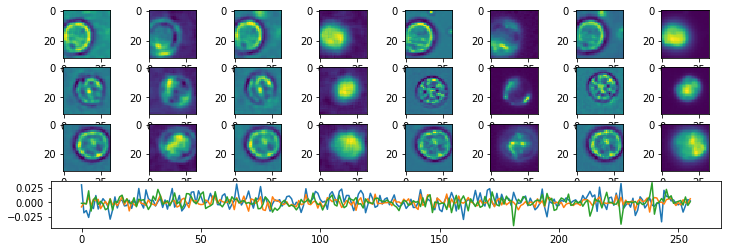

Epoch:  34 Iteration:  0 Loss:  2.0021656 1.837767 0.16439866


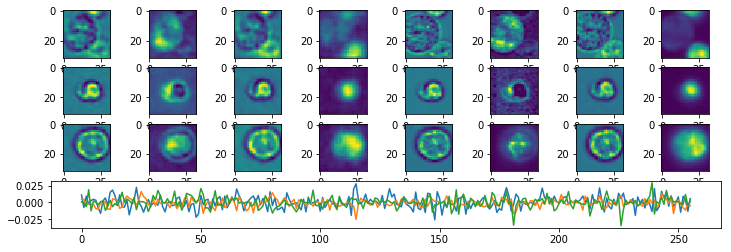

Epoch:  35 Iteration:  0 Loss:  2.0056345 1.8524221 0.15321246


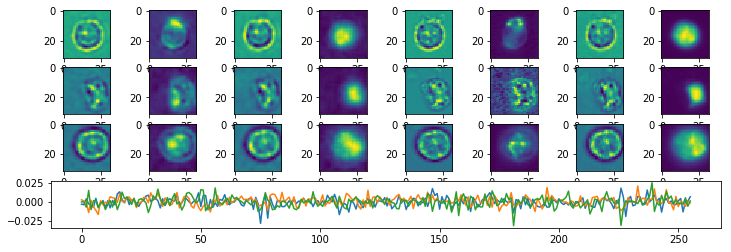

Epoch:  36 Iteration:  0 Loss:  1.9285268 1.7813944 0.1471324


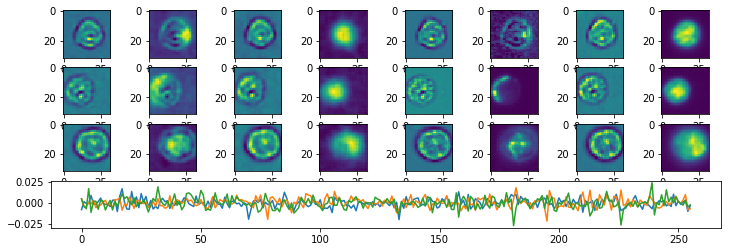

Epoch:  37 Iteration:  0 Loss:  2.039783 1.8982841 0.14149888


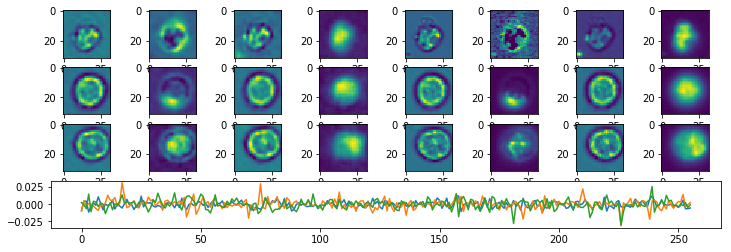

Epoch:  38 Iteration:  0 Loss:  1.8290647 1.6872448 0.14181995


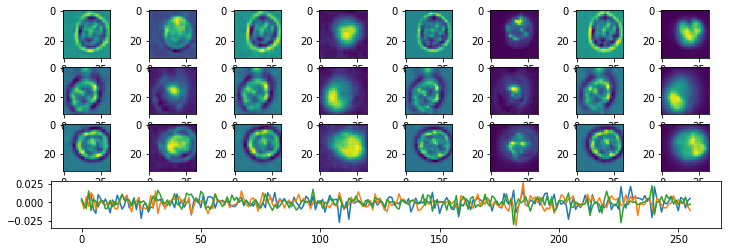

Epoch:  39 Iteration:  0 Loss:  1.826841 1.6930598 0.13378124


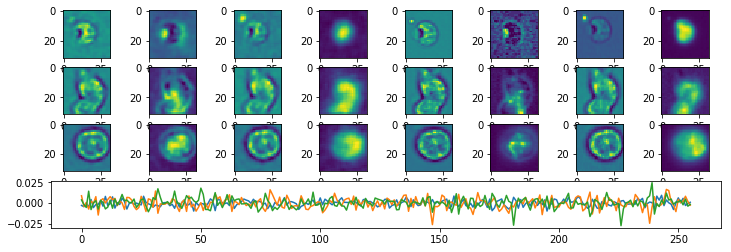

Epoch:  40 Iteration:  0 Loss:  1.8275954 1.6928698 0.1347256


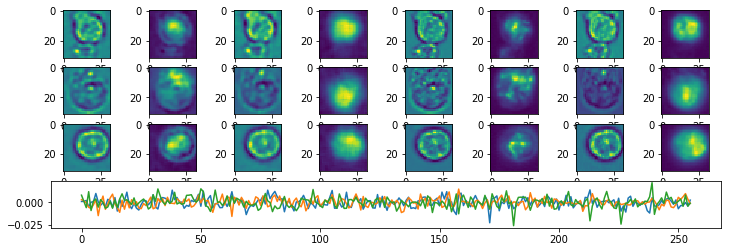

Epoch:  41 Iteration:  0 Loss:  1.8585464 1.7359293 0.12261714


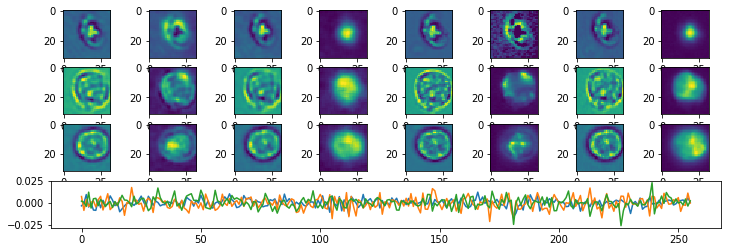

Epoch:  42 Iteration:  0 Loss:  1.7155837 1.5875162 0.12806754


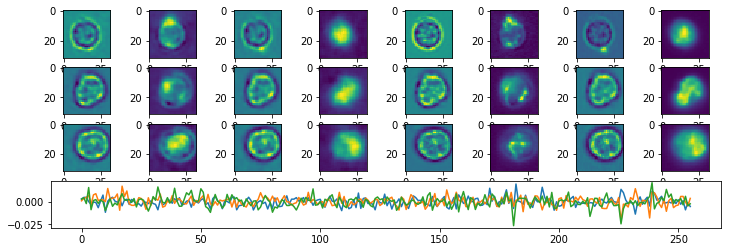

Epoch:  43 Iteration:  0 Loss:  1.6326094 1.514672 0.117937274


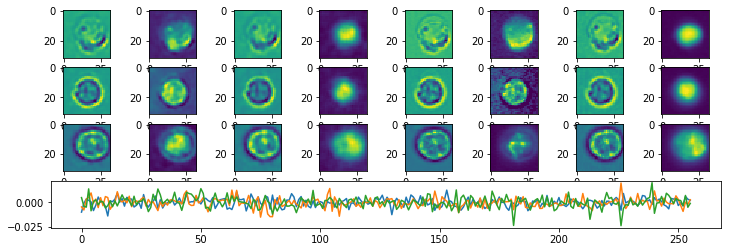

Epoch:  44 Iteration:  0 Loss:  1.6515458 1.5298836 0.121662125


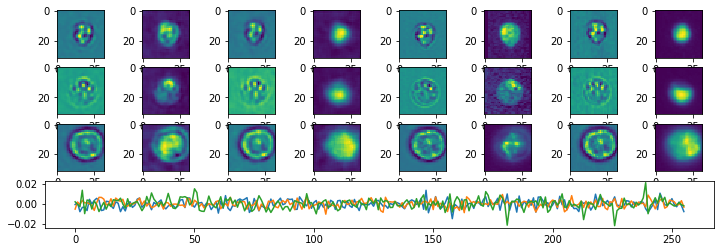

Epoch:  45 Iteration:  0 Loss:  1.744773 1.6302856 0.11448739


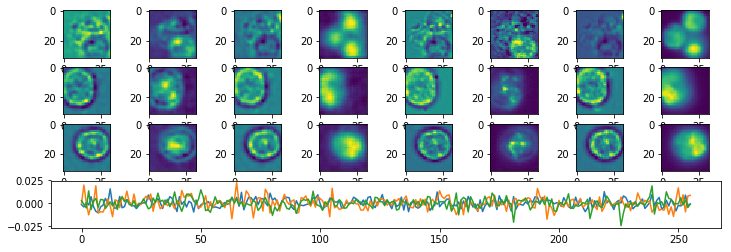

Epoch:  46 Iteration:  0 Loss:  1.7121722 1.598764 0.11340822


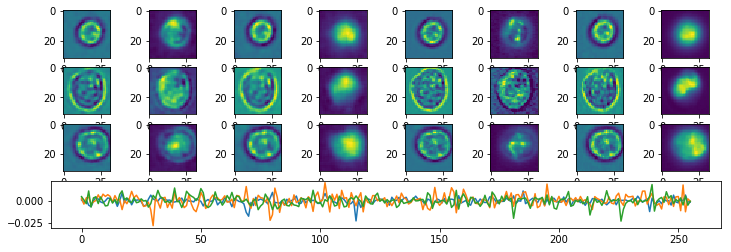

Epoch:  47 Iteration:  0 Loss:  2.0650616 1.8424301 0.22263147


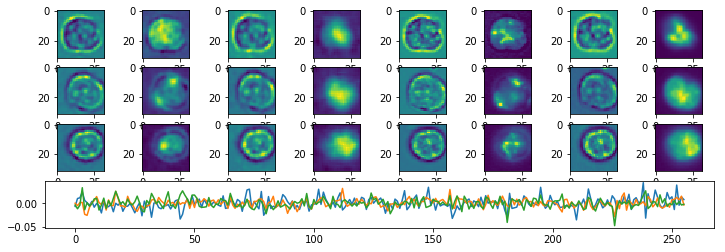

Epoch:  48 Iteration:  0 Loss:  1.8470383 1.6646285 0.18240973


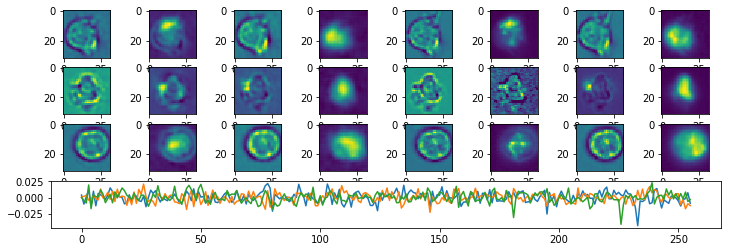

Epoch:  49 Iteration:  0 Loss:  1.8525567 1.6881377 0.164419


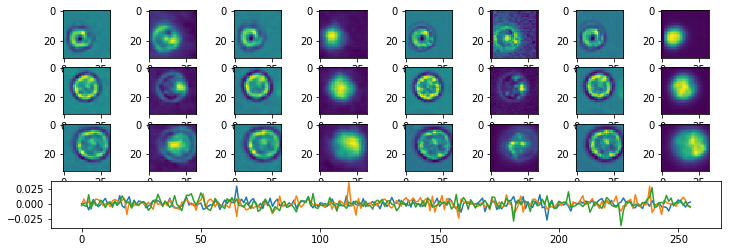

Epoch:  50 Iteration:  0 Loss:  1.8144616 1.6590118 0.15544975


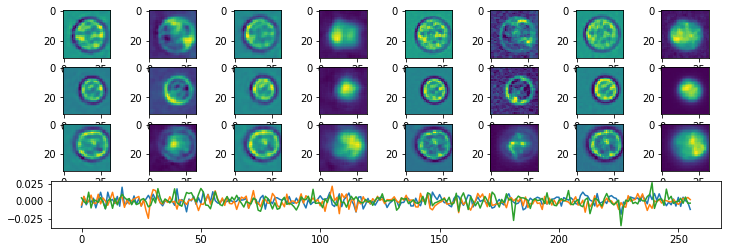

Epoch:  51 Iteration:  0 Loss:  1.6893294 1.5472958 0.14203364


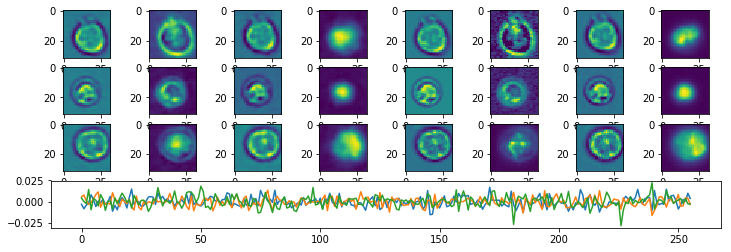

Epoch:  52 Iteration:  0 Loss:  1.5981319 1.4621441 0.13598771


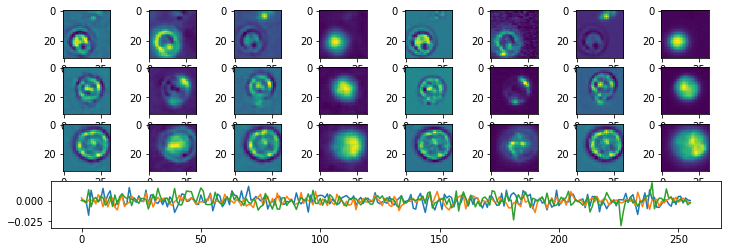

Epoch:  53 Iteration:  0 Loss:  1.6290734 1.4985992 0.13047421


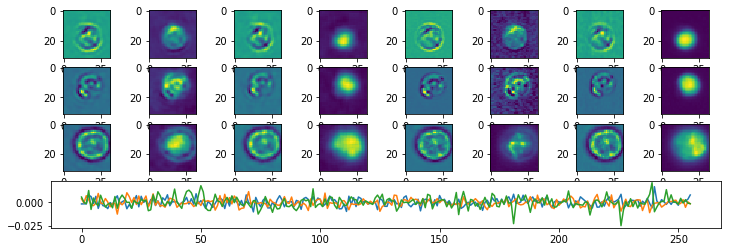

Epoch:  54 Iteration:  0 Loss:  1.6211419 1.4940522 0.1270897


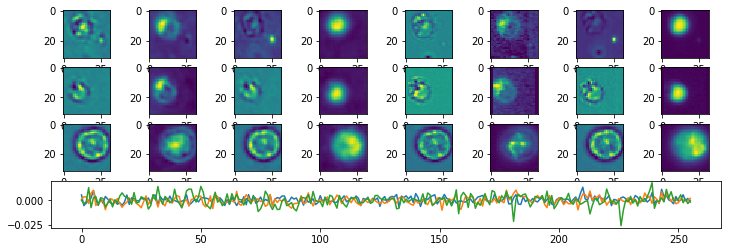

Epoch:  55 Iteration:  0 Loss:  1.6208299 1.5037665 0.117063366


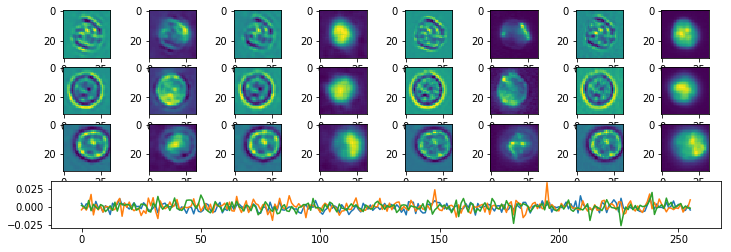

Epoch:  56 Iteration:  0 Loss:  1.6026701 1.4866972 0.11597286


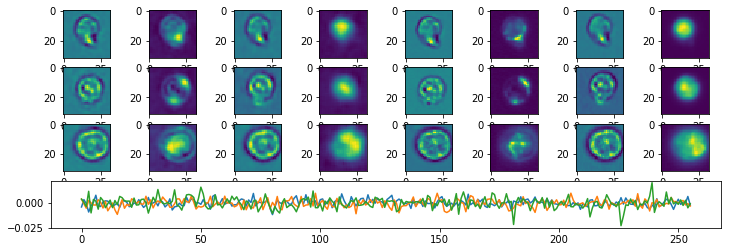

Epoch:  57 Iteration:  0 Loss:  1.5821974 1.463403 0.11879447


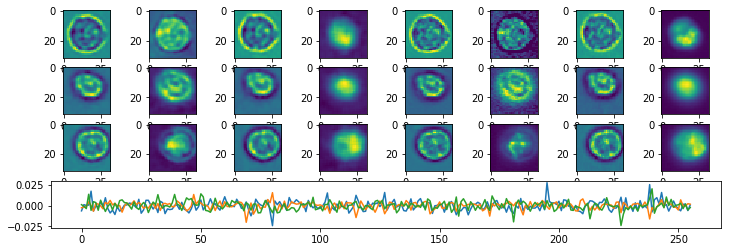

Epoch:  58 Iteration:  0 Loss:  1.5644422 1.447675 0.11676714


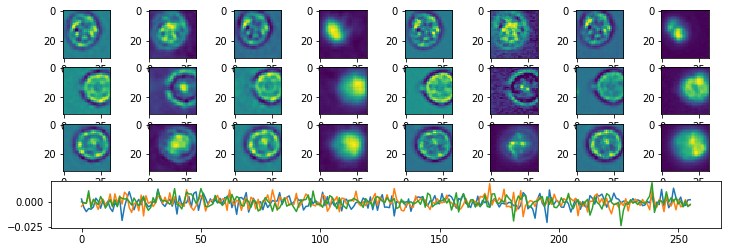

Epoch:  59 Iteration:  0 Loss:  1.6091404 1.499723 0.10941741


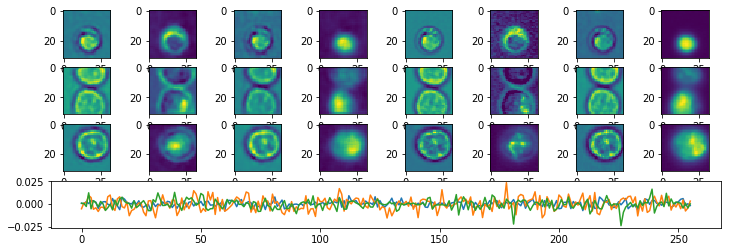

Done


In [4]:

p_mmdict = mmdict #{"Fish6_15_cjw_64.tif.mm": m3}
#             "plate04_all.mm": m4}

p_width = 32
p_height = 32
p_nchannels = 4
p_channels = [0,1,3,4]
p_nepochs = 60
p_batchsize = 128
p_learning_rate = 0.0001  #.00005
p_restore = False
p_latent_size = 256 #128 + 64
p_droprate = 0.85
p_stdev = .04
p_slam = .001
p_denoise = None
enc_sizes = [(128, 3), (256, 3), (512, 3)]  #128, 3)]
######enc_sizes = [(64, 3), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
#enc_sizes = [(16, 5), (32, 3), (64,3), (128,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
#dec_sizes.append((p_nchannels,7))

params = dict()

params['width'] = p_width
params['height'] = p_height
params['nchannels'] = p_nchannels
params['channels'] = p_channels
params['nepochs'] = p_nepochs
params['batchsize'] = p_batchsize
params['learning_rate'] = p_learning_rate
params['restore'] = p_restore
params['latent_size'] = p_latent_size
params['droprate'] = p_droprate
params['stdev'] = p_stdev
params['slam'] = p_slam
params['enc_sizes'] = enc_sizes
params['dec_sizes'] = dec_sizes
params['denoise'] = p_denoise
cpdir = "/media/cjw/Data/cyto/Checkpoints/2018-07-30-Mouse/"

if not os.path.exists(cpdir):
    os.makedirs(cpdir)
autoencoder_train.train(p_mmdict, p_df, params, 1000, cpdir)

In [5]:
x = 4
x

4